# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

In [5]:
X = pd.get_dummies( data, columns = ['occupation', 'occupation_husb', 'religious'] )

In [6]:
X.head()

,rate_marriage,age,yrs_married,children,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [7]:
del X['affair']

In [8]:
Y = data['affair']

In [9]:
model = LogisticRegression()

In [10]:
# разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0 )

In [11]:
model.fit( X_train, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
predictions = model.predict_proba( X_test )

In [13]:
for line in zip( predictions[:, 1], Y_test ):
    print( line )

(0.64583230012025084, 0)
(0.07595289349122808, 0)
(0.27053457862747915, 0)
(0.2694230464533362, 0)
(0.26429749140583736, 1)
(0.14428717083069897, 0)
(0.17864141565818453, 0)
(0.21881826849247951, 0)
(0.75273004950151612, 1)
(0.26902322860090844, 0)
(0.11218405835224728, 0)
(0.1874104697965058, 0)
(0.081860334854969852, 0)
(0.31116985531197217, 0)
(0.72820351504670111, 1)
(0.59178966479217554, 0)
(0.28637675256615297, 0)
(0.72134331817231867, 1)
(0.29509672868286846, 0)
(0.15675995913185814, 0)
(0.21610231191338983, 1)
(0.46224311997310535, 1)
(0.076802921770468921, 1)
(0.45786003853516477, 1)
(0.17663412025936454, 0)
(0.17444079534067045, 0)
(0.40760511205670469, 0)
(0.38030084092702943, 0)
(0.24747635214723676, 0)
(0.11162882622664458, 0)
(0.1452274731538567, 0)
(0.30078923520044398, 1)
(0.20312712260246937, 0)
(0.49656130081092903, 1)
(0.61990300211966487, 1)
(0.39289776264518267, 1)
(0.1095273692871573, 0)
(0.18921467989841387, 0)
(0.28724215165173256, 1)
(0.15181437563249525, 0)
(0

In [14]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [15]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [16]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.32373333333333332, 1.0, 0.068870258588032959)
(0.3233724653148346, 0.99835255354200991, 0.069092684659312384)
(0.32354511478910836, 0.99835255354200991, 0.069328923802661591)
(0.32371794871794873, 0.99835255354200991, 0.070479497208315048)
(0.32389096739711382, 0.99835255354200991, 0.070749831036137481)
(0.32406417112299463, 0.99835255354200991, 0.072010897964738432)
(0.32423756019261635, 0.99835255354200991, 0.072388925166742418)
(0.32387580299785867, 0.99670510708401971, 0.073836651386858354)
(0.32404927691483665, 0.99670510708401971, 0.073843765062180391)
(0.32422293676312969, 0.99670510708401971, 0.073957733038298654)
(0.32439678284182305, 0.99670510708401971, 0.074148687892864634)
(0.32457081545064376, 0.99670510708401971, 0.074787239615924761)
(0.32474503488996243, 0.99670510708401971, 0.07595289349122808)
(0.32509403546480387, 0.99670510708401971, 0.076041390249954488)
(0.32526881720430106, 0.99670510708401971, 0.076131143316467781)
(0.32544378698224852, 0.99670510708401971, 

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


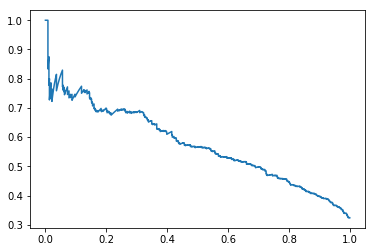

In [18]:
plt.plot( re, pr )

In [19]:
from sklearn.metrics import average_precision_score

In [20]:
average_precision_score( Y_test, predictions[:, 1] )

0.57556943826904927

In [21]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [22]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [23]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0016474464579901153, 0.92829523512415135)
(0.0, 0.0082372322899505763, 0.88177332562051347)
(0.00076745970836531081, 0.0082372322899505763, 0.88016239996260148)
(0.00076745970836531081, 0.011532125205930808, 0.87768042116899447)
(0.0015349194167306216, 0.011532125205930808, 0.8768996539822318)
(0.0015349194167306216, 0.013179571663920923, 0.87545683842916766)
(0.0023023791250959325, 0.013179571663920923, 0.87013636254769977)
(0.0023023791250959325, 0.018121911037891267, 0.86621994284083614)
(0.0030698388334612432, 0.018121911037891267, 0.86530044633475778)
(0.0030698388334612432, 0.021416803953871501, 0.85904744027378577)
(0.0038372985418265539, 0.021416803953871501, 0.85231356702509553)
(0.0038372985418265539, 0.036243822075782535, 0.82750592432432091)
(0.0053722179585571758, 0.036243822075782535, 0.82468785785176646)
(0.0053722179585571758, 0.056013179571663921, 0.79369189508850579)
(0.0076745970836531079, 0.056013179571663921, 0.78893871721815834)
(0.0076745970836531079, 0.0

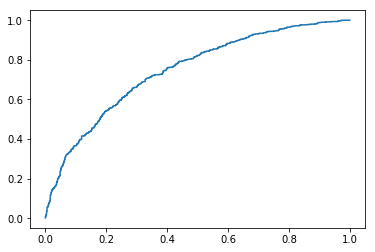

In [24]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [25]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [26]:
model2 = LogisticRegression()

In [27]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [28]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
predictions2 = model2.predict_proba( X_test_short )

In [30]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

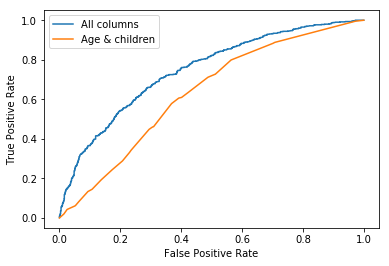

In [31]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_auc_score( Y_test, predictions[:, 1] )

0.74602014613343182

In [34]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.63114520919282713

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [35]:
from sklearn.metrics import auc

In [36]:
auc( fpr, tpr )

0.74602014613343182

In [37]:
auc( fpr2, tpr2 )

0.63114520919282713

## Пример влияния L1 и L2-регуляризации

In [38]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [39]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [40]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [41]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

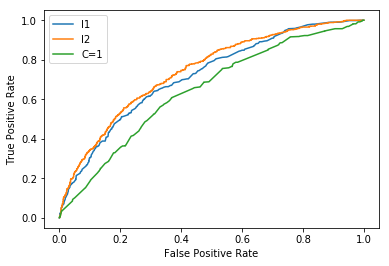

In [42]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [43]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [44]:
Y = data['affair']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [46]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [47]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [48]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

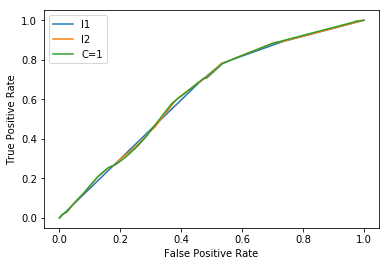

In [49]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()